Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.


The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 


In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.


Now, the bank is looking for your help to understand various patterns among the data that might be useful in identifying customers that could show higher intent towards a recommended credit card, given:

    Customer details (gender, age, region etc.)
    Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

Data Dictionary
Train Data

Variable
	

Definition

ID
	

Unique Identifier for a row

Gender
	

Gender of the Customer

Age
	

Age of the Customer (in Years)

Region_Code
	

Code of the Region for the customers

Occupation
	

Occupation Type for the customer

Channel_Code
	

Acquisition Channel Code for the Customer  (Encoded)

Vintage
	

Vintage for the Customer (In Months)

Credit_Product
	

If the Customer has any active credit product (Home loan,

Personal loan, Credit Card etc.)

Avg_Account_Balance
	

Average Account Balance for the Customer in last 12 Months

Is_Active
	

If the Customer is Active in last 3 Months

Is_Lead(Target)
	

If the Customer is interested for the Credit Card

0 : Customer is not interested

1 : Customer is interested

Sample Submission

This file contains the exact submission format for the predictions. Please submit CSV file only.
Variable 	Definition
ID 	Unique Identifier for a row
Is_Lead 	(Target) Probability of Customer showing interest (class 1)




In [11]:
# Opening and Reading data

In [12]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('train.csv')
df.head()

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
3  BF3NC7KV    Male   34       RG270       Salaried           X1       19   
4  TEASRWXV  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0

In [14]:
# Dropping the unecessary column to simplify analysis

In [15]:
df.drop('ID',axis=1,inplace = True)
df

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0       Female   73       RG268          Other           X3       43   
1       Female   30       RG277       Salaried           X1       32   
2       Female   56       RG268  Self_Employed           X3       26   
3         Male   34       RG270       Salaried           X1       19   
4       Female   30       RG282       Salaried           X1       33   
...        ...  ...         ...            ...          ...      ...   
245720    Male   51       RG284  Self_Employed           X3      109   
245721    Male   27       RG268       Salaried           X1       15   
245722  Female   26       RG281       Salaried           X1       13   
245723  Female   28       RG273       Salaried           X1       31   
245724    Male   29       RG269       Salaried           X1       21   

       Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0                  No              1045696        No        0  
1                  No               581988        No        0  
2                  No              1484315       Yes        0  
3                  No               470454        No        0  
4                  No               886787        No        0  
...               ...                  ...       ...      ...  
245720            NaN              1925586        No        0  
245721             No               862952       Yes        0  
245722             No               670659        No        0  
245723             No               407504        No        0  
245724             No              1129276        No        0  

[245725 rows x 10 columns]

In [16]:
# Convert target (is_lead is numeric) to catrgorical data 

In [18]:
df['Is_Lead'] = df['Is_Lead'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Gender               245725 non-null  object  
 1   Age                  245725 non-null  int64   
 2   Region_Code          245725 non-null  object  
 3   Occupation           245725 non-null  object  
 4   Channel_Code         245725 non-null  object  
 5   Vintage              245725 non-null  int64   
 6   Credit_Product       216400 non-null  object  
 7   Avg_Account_Balance  245725 non-null  int64   
 8   Is_Active            245725 non-null  object  
 9   Is_Lead              245725 non-null  category
dtypes: category(1), int64(3), object(6)
memory usage: 17.1+ MB


In [20]:
# Selecting categorical columns
cat_cols = df.select_dtypes(include=['category','object']).columns

# Selecting numerical columns
num_cols = df.select_dtypes(include = ['int64']).columns

In [23]:
len(cat_cols)

7

In [24]:
len(num_cols)

3

In [ ]:
# Using autoviz library to automate data analytics

    max_rows_analyzed is smaller than dataset shape 245725...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 11)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    11 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All Scatter Plots = 6


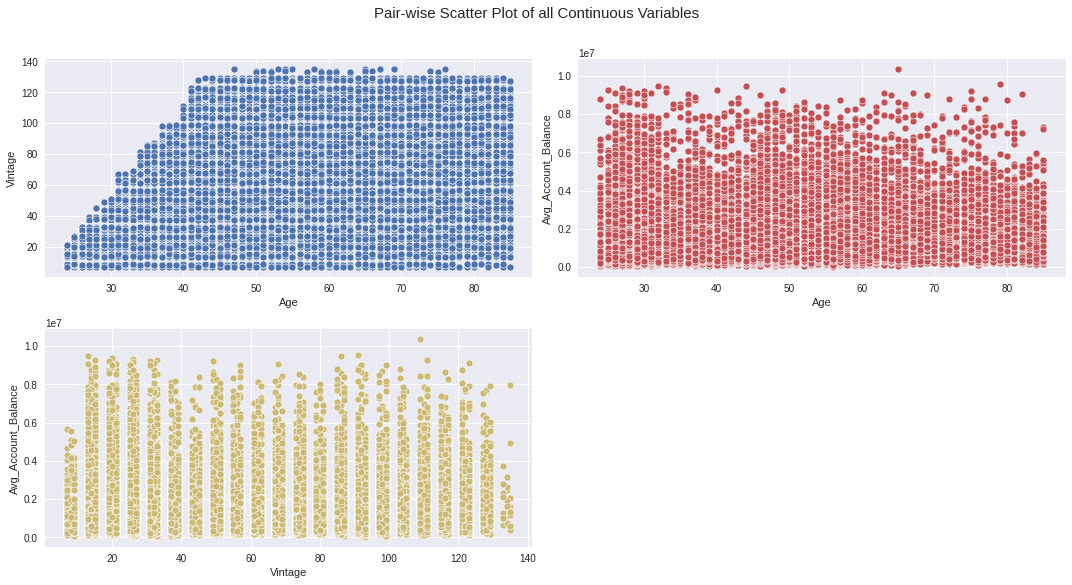

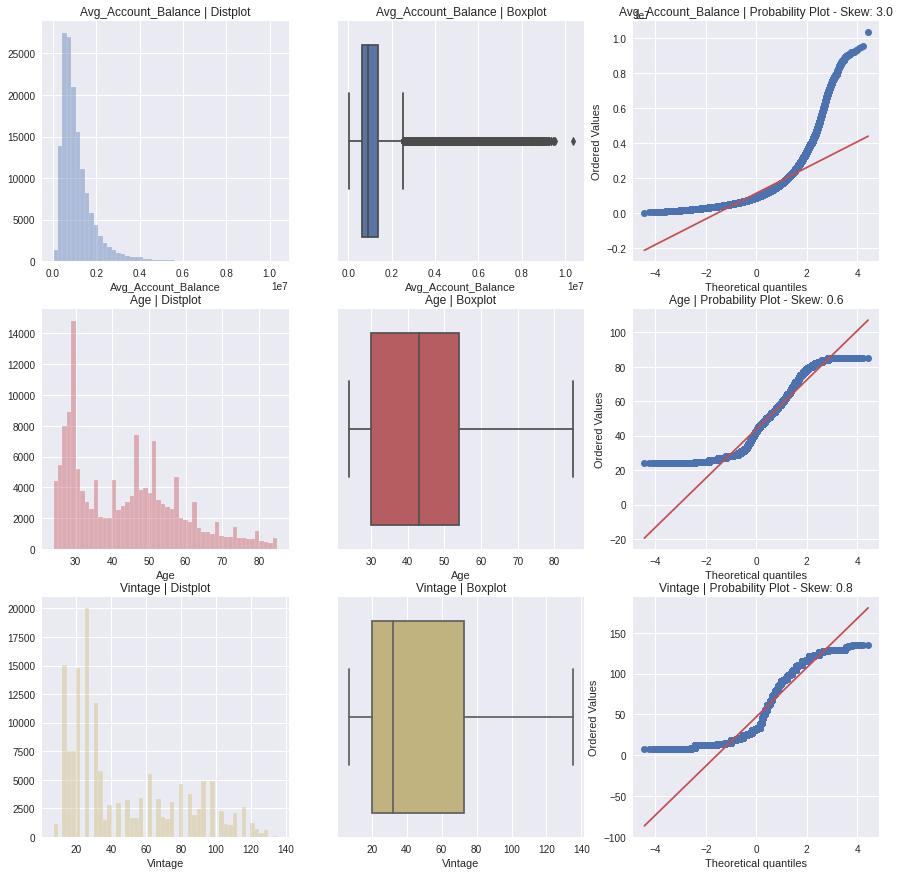

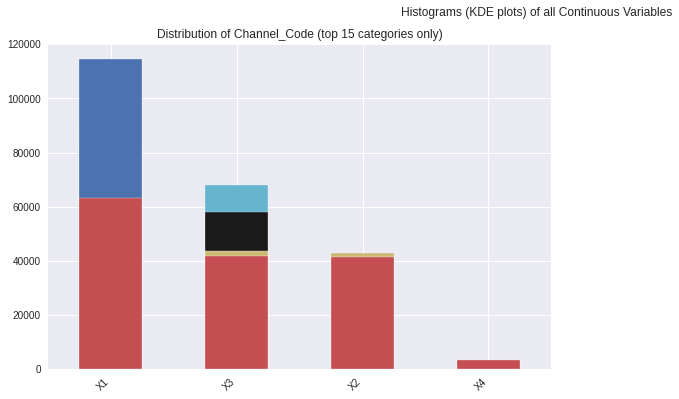

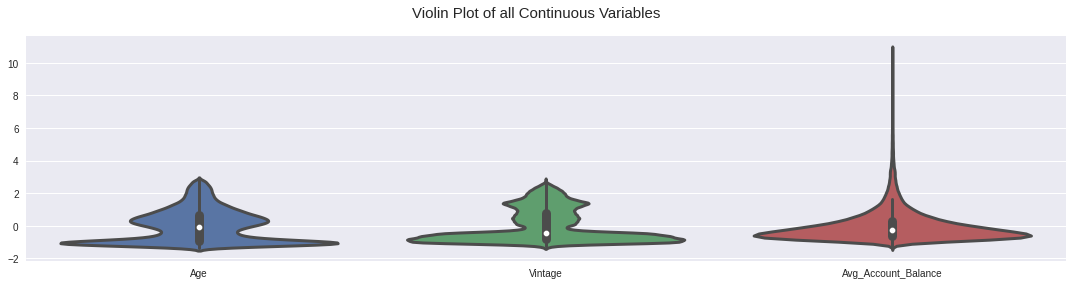

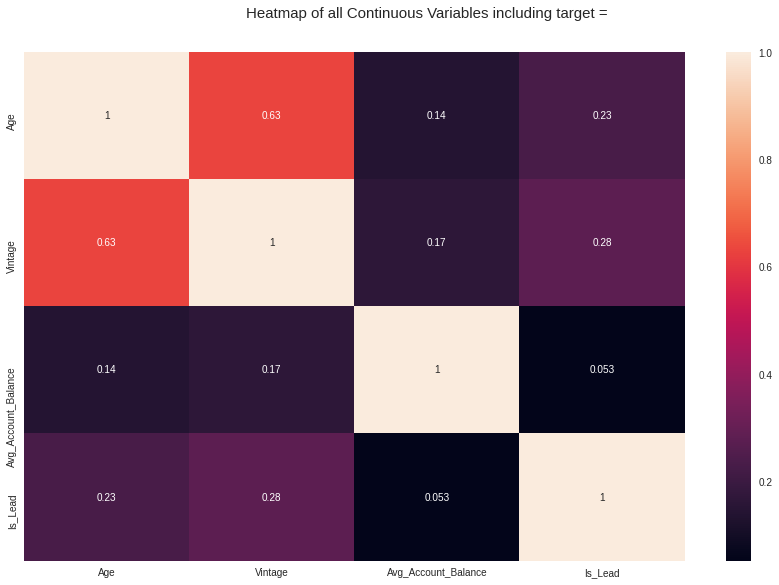

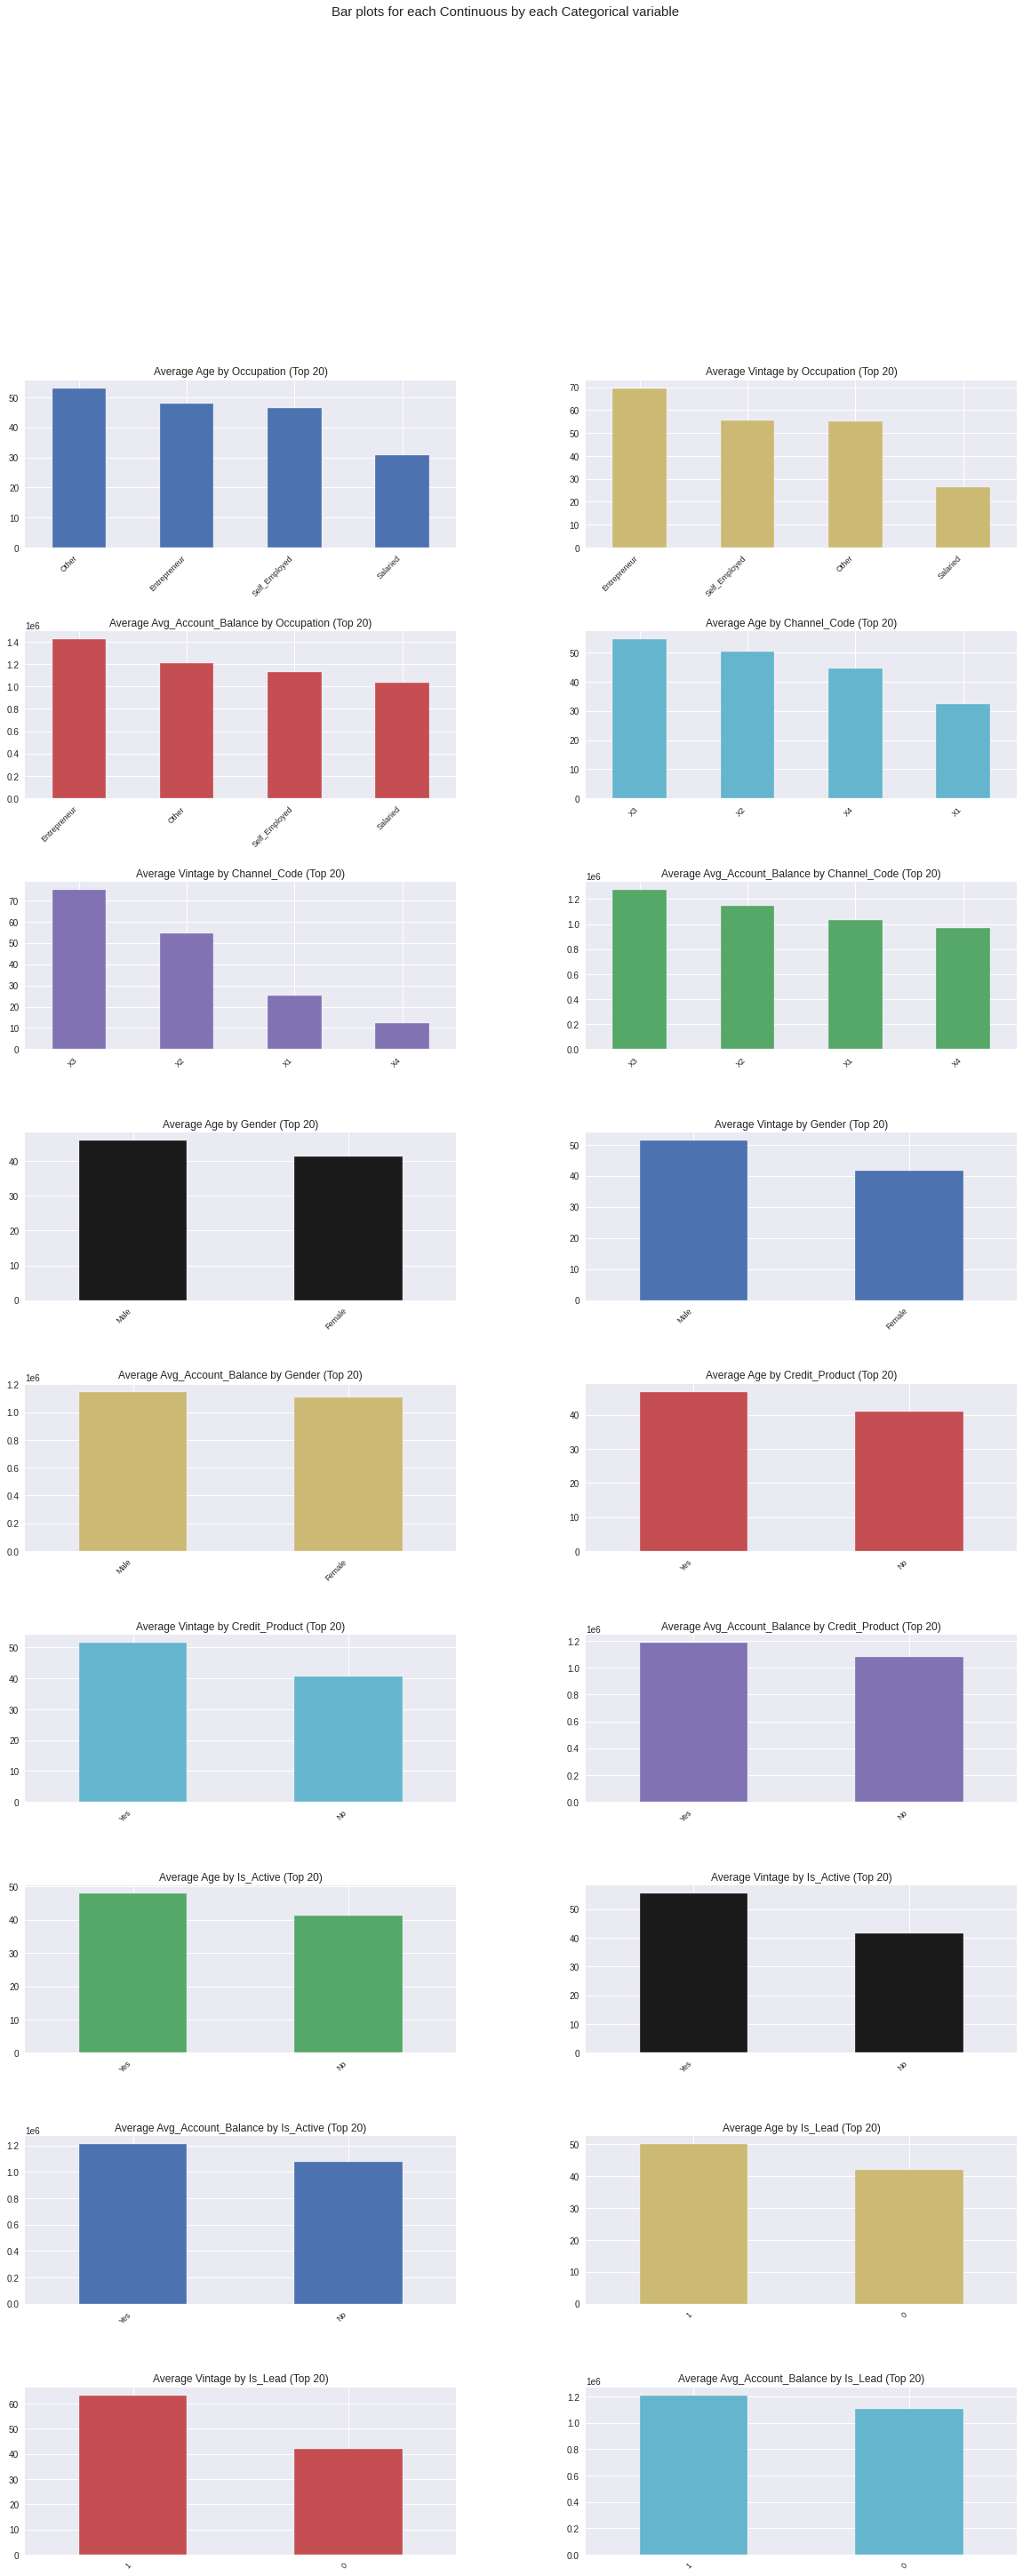

Time to run AutoViz (in seconds) = 11

 ###################### VISUALIZATION Completed ########################


In [119]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
av =  AV.AutoViz('train.csv')

In [25]:
# analysing missing data

In [26]:
df.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [27]:
# finding out the % of missing values

In [35]:
round(df.Credit_Product.isnull().sum()*100/df.shape[0],2)

11.93

In [ ]:
# Finding the unique values present in each column

In [36]:
df.nunique()

Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [37]:
# Descriptive statistics

In [ ]:
# For Numerical columns

In [38]:
df.describe()

Age        Vintage  Avg_Account_Balance
count  245725.000000  245725.000000         2.457250e+05
mean       43.856307      46.959141         1.128403e+06
std        14.828672      32.353136         8.529364e+05
min        23.000000       7.000000         2.079000e+04
25%        30.000000      20.000000         6.043100e+05
50%        43.000000      32.000000         8.946010e+05
75%        54.000000      73.000000         1.366666e+06
max        85.000000     135.000000         1.035201e+07

In [ ]:
# For categorical columns

In [42]:
df.describe(include=['O','category'])

Gender Region_Code     Occupation Channel_Code Credit_Product  \
count   245725      245725         245725       245725         216400   
unique       2          35              4            4              2   
top       Male       RG268  Self_Employed           X1             No   
freq    134197       35934         100886       103718         144357   

       Is_Active  Is_Lead  
count     245725   245725  
unique         2        2  
top           No        0  
freq      150290   187437

In [43]:
# Univariate Analysis

In [58]:
num_cols

Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')

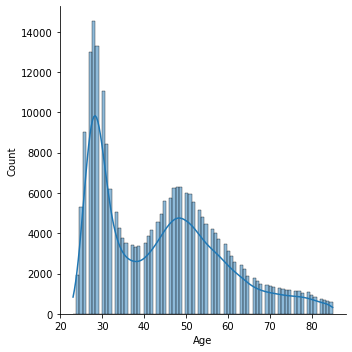

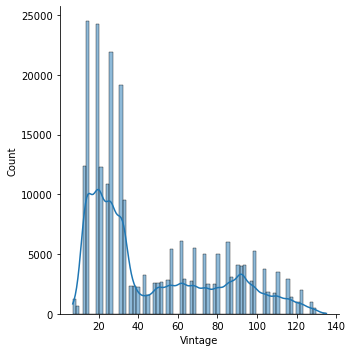

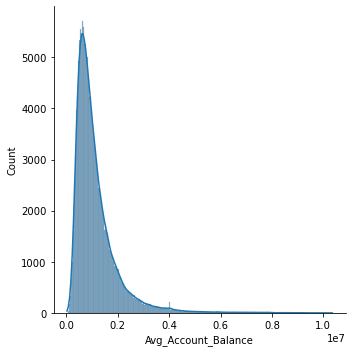

In [59]:
for col in num_cols:
    sns.displot(df,x=col, kde=True)

In [60]:
# We can see that all the plots are skewed towards right so we need to apply transformation to convert these to normal distribution.

In [62]:
cat_cols

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active', 'Is_Lead'],
      dtype='object')

In [66]:
num_cols

Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')

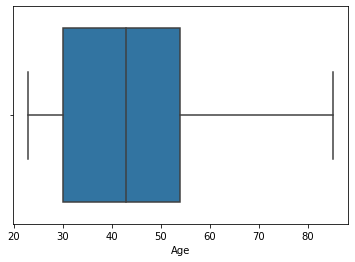

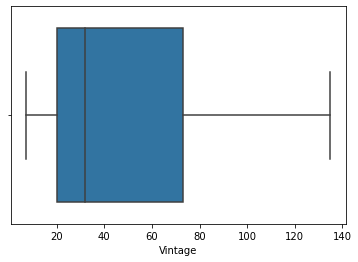

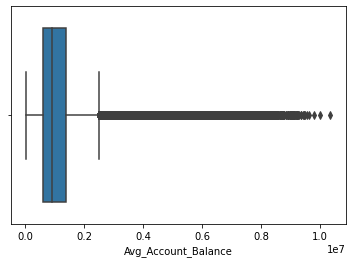

In [75]:
for i, col in enumerate(num_cols):
    plt.figure(i)
    sns.boxplot(x=col, data=df)

In [76]:
# Using log transform we can normalize these distributions

/home/kshitij/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Density'>

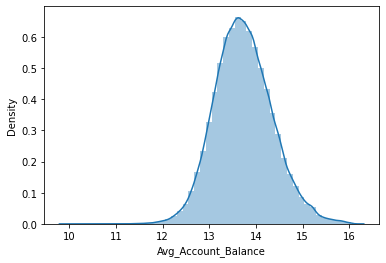

In [77]:
New_Avg_Account_Balance = np.log(df['Avg_Account_Balance'])
sns.distplot(New_Avg_Account_Balance)

In [78]:
# Finding correlation between numerical columns using heat map

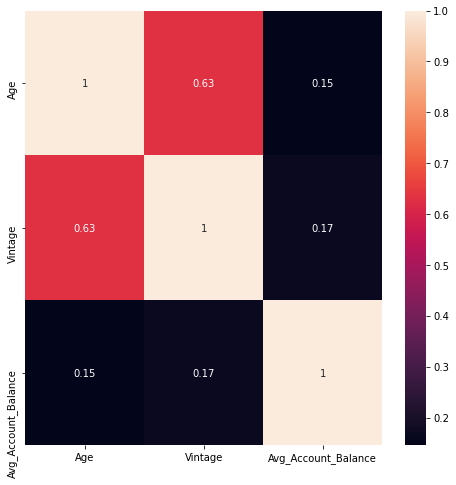

In [89]:
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [90]:
# We can see there is a high correlation between vintage and age

In [95]:
# Bivariate Analysis

In [102]:
cat_cols

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active', 'Is_Lead'],
      dtype='object')

In [105]:
new_cat_cols = ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active', 'Is_Lead']

In [106]:
fig, axes = plt.subplots(nrows=len(new_cat_cols), ncols=3, figsize=(12, len(cat_cols)*2), dpi=600)
for i, cat_col in enumerate(new_cat_cols):
    for j, num_col in enumerate(num_cols):
        ax_sns = sns.kdeplot(x = num_col, data=df, hue=cat_col, label=col, ax=axes[i, j])
        
        # Customize the plot
        ax_sns.tick_params(axis='y', labelsize=0)
        axes[i, j].set_xlabel(" ".join(num_col.split('_')), weight='bold')
        if j != 0:
            axes[i, j].set_ylabel("")
            axes[i, j].legend_.remove()
        else:
            axes[i, j].set_ylabel("Density", weight='bold')

        for spine in ['top', 'right']:
            axes[i, j].spines[spine].set_visible(False)
plt.tight_layout()

In [107]:
fig, axes = plt.subplots(nrows=len(new_cat_cols), ncols=3, figsize=(12, 3*len(new_cat_cols)), dpi=600)
for i, cat_col in enumerate(new_cat_cols):
    for j, num_col in enumerate(num_cols):
        ax_sns = sns.boxplot(y=num_col, x=cat_col, data=df, ax=axes[i,j])

        # Customize the plot
        axes[i, j].set_ylabel(num_col, weight='bold')
        axes[i, j].set_xlabel(cat_col, weight='bold')

        for spine in ['top', 'right']:
            axes[i, j].spines[spine].set_visible(False)
plt.tight_layout()

In [108]:
# Large amount of outliers are present in the case of avg account balance

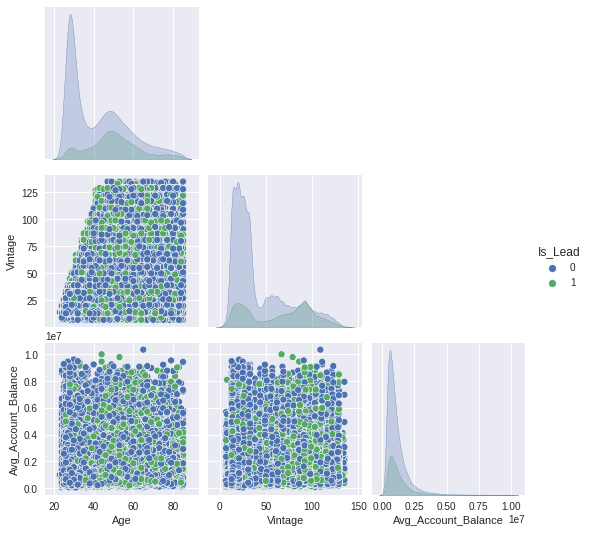

In [120]:
sns.pairplot(df,hue='Is_Lead',corner=True)

In [114]:
# Relationship between Missing Values and Target

In [116]:
na_df = df.groupby('Credit_Product')['Is_Lead'].value_counts(normalize=True)
na_df

Credit_Product  Is_Lead
No              0          0.926412
                1          0.073588
Null            1          0.851662
                0          0.148338
Yes             0          0.685049
                1          0.314951
Name: Is_Lead, dtype: float64

In [ ]:
# We can see that age greater than 50 produces maximum leads